# 一元线性回归

In [1]:
#coding:utf-8
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(1991,2003).reshape(-1,1)

In [3]:
Y = np.array([1659,1989,2195,2255,2329,2375,2364,2354,2418,2534,2568,2835]).reshape(-1,1)

In [4]:
# 求X Y 的平均值 X_mean Y_mean
X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [5]:
# 计算残差 l_xx l_yy l_xy
l_xx = np.sum((X - X_mean) ** 2)
l_yy = np.sum((Y - Y_mean) ** 2)
l_xy = np.sum((X - X_mean) * (Y-Y_mean))

In [6]:
# 计算系数 b_hat a_hat
b_hat = l_xy / l_xx
a_hat = Y_mean - b_hat * X_mean

In [7]:
print("a_hat的值为："+str(a_hat),"b_hat的值为："+str(b_hat))
print("回归方程为：y_hat="+str(a_hat)+"+"+str(b_hat)+"x")

a_hat的值为：-147058.564103 b_hat的值为：74.8216783217
回归方程为：y_hat=-147058.564103+74.8216783217x


In [8]:
# 相关性检验
R = l_xy/(l_xx * l_yy) ** 0.5
print (R)# R = 0.9158 接近+1 属于正相关，x y之间存在显著的线性关系

0.915787159584


In [9]:
def A_lin(X):
    y_hat = a_hat + b_hat * X
    return y_hat

In [10]:
# 预测分析
Y_2004 = A_lin(2004)
# Y_2004 的95%的预测空间

sigma = ((l_yy - b_hat * l_xy) / (12 - 2)) ** 0.5
delte = 2.228 * sigma * (1 + 1/12 + (2004 - X_mean) ** 2 / l_xx) ** 0.5 # 通过查 t分为数表得 t_0.025(10) = 2.228
print("预测区间为：["+str(Y_2004 - delte)+","+str(Y_2004 + delte)+"]")

预测区间为：[2548.09142051,3220.06708765]


In [11]:
Y_p = A_lin(X)

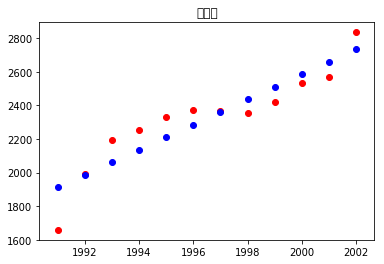

In [12]:
plt.scatter(X,Y,color='red')
plt.scatter(X,Y_p,color='blue')
plt.title("对比图") #蓝色为预测值 红色为实际值
plt.show()

# 多元线性回归 

In [13]:
# X1 年份 X2 市人口数 X3 c城市GDP Y1 水路客运量 
Years = np.arange(1991,2003).reshape(-1,1)
Y = np.array([342,466,492,483,530,553,581.5,634.8,656.1,664.4,688.3,684.4]).reshape(-1,1)
X1 = np.array([520,522.9,527.1,531.5,534.7,537.4,540.4,543.2,545.3,551.5,554.6,557.93]).reshape(-1,1)
X2 = np.array([211.9,244.6,325.1,528.1,645.1,733.1,829.7,926.3,1003.1,1110.8,1235.6,1406]).reshape(-1,1)
X1_mean = np.mean(X1) + np.zeros((12,1))
X1_dev = X1 - X1_mean
X2_mean = np.mean(X2) + np.zeros((12,1))
X2_dev = X2 - X2_mean
Y_mean = np.mean(Y) +  np.zeros((12,1))
Y_dev = Y - Y_mean

In [14]:
import pandas as pd

In [15]:
data = np.column_stack((Years,X1,X1_mean,X1_dev,X2,X2_mean,X2_dev,Y,Y_mean,Y_dev))

In [16]:
df = pd.DataFrame(data,columns=['年份','X1','X1_mean','X1_dev','X2','X2_mean','X2_dev','Y','Y_mean','Y_dev'])
df

,年份,X1,X1_mean,X1_dev,X2,X2_mean,X2_dev,Y,Y_mean,Y_dev
0,1991.0,520.00,538.8775,-18.8775,211.9,766.616667,-554.716667,342.0,564.625,-222.625
1,1992.0,522.90,538.8775,-15.9775,244.6,766.616667,-522.016667,466.0,564.625,-98.625
2,1993.0,527.10,538.8775,-11.7775,325.1,766.616667,-441.516667,492.0,564.625,-72.625
3,1994.0,531.50,538.8775,-7.3775,528.1,766.616667,-238.516667,483.0,564.625,-81.625
4,1995.0,534.70,538.8775,-4.1775,645.1,766.616667,-121.516667,530.0,564.625,-34.625
5,1996.0,537.40,538.8775,-1.4775,733.1,766.616667,-33.516667,553.0,564.625,-11.625
6,1997.0,540.40,538.8775,1.5225,829.7,766.616667,63.083333,581.5,564.625,16.875
7,1998.0,543.20,538.8775,4.3225,926.3,766.616667,159.683333,634.8,564.625,70.175
8,1999.0,545.30,538.8775,6.4225,1003.1,766.616667,236.483333,656.1,564.625,91.475
9,2000.0,551.50,538.8775,12.6225,1110.8,766.616667,344.183333,664.4,564.625,99.775


In [17]:
temp = np.ones((12,1))
X = np.column_stack((temp,X1,X2))

## 参数的最小二乘估计
$$ x\hat{B}=y \rightarrow (x^Tx)\hat{B}=x^Ty\rightarrow \hat{B}=(x^Tx)^{-1}(x^Ty)  $$ 

In [18]:
B = np.array(np.dot((np.mat(np.dot(X.T,X)).I),np.dot(X.T,Y))).reshape(3,)

In [19]:
b_hat0,b_hat1,b_hat2 = B
print("回归方程为：y_hat = "+str(b_hat0)+" + "+str(b_hat1)+"x1 + "+str(b_hat2)+"x2")

回归方程为：y_hat = -8304.0869766 + 16.8392755476x1 + -0.268184532375x2


## 多元线性回归模型的检验


In [20]:
def M_lin(X):
    y_hat =  b_hat0 + b_hat1 * X[:,1] + b_hat2 * X[:,2]
    return y_hat

In [21]:
y_hat = M_lin(X).reshape(-1,1) #确保y_hat不是秩为1的数组

In [22]:
# TSS ESS RSS 分别为 离差平方和 回归平凡和 残差平方和
TSS = np.sum((Y - Y_mean) ** 2) 
ESS = np.sum((y_hat - Y_mean) ** 2)
RSS = TSS - ESS
print ("TSS: "+str(TSS)+" ESS: "+str(ESS)+" RSS:"+str(RSS))

TSS: 125733.4225 ESS: 116009.766116 RSS:9723.65638363


### 拟合优度检验

拟合优度：$$R^2=ESS/TSS \quad (0 \leq R^2 \leq 1)$$
拟合优度修正值：$$\bar{R^2}=1-(1-R^2)\frac{n-1}{n-m-1}$$

In [23]:
def R_test(ESS,TSS,n,m):
    R2 = ESS/TSS
    Rl2 = 1 - (1-R2)*(n-1)/(n-m-1)
    return R2,Rl2

In [24]:
R2,Rl2 = R_test(ESS,TSS,12,2)
print ("R2: "+str(R2)+" Rl2:"+str(Rl2))

R2: 0.922664505664 Rl2:0.905478840256


### F检验

$$F=\frac{\frac{ESS}{m}}{\frac{RSS}{n-m-1}}$$

In [25]:
def F_test(ESS,RSS,n,m):
    F = ESS/m/(RSS/(n-m-1))
    return F

In [26]:
F = F_test(ESS,RSS,12,2)
print("F:"+str(F))

F:53.6880291659


通过查F-test临界值表得：$$F_{0.05}(2,12-2-1)=4.26 <F$$ 
所以回归方程有意义

### t检验
$$|T_i|=\frac{\hat{b_i}}{\sqrt{\frac{1}{n-m-1}\sum_{i=1}^n(y_i-\hat{y_i})^2(x^Tx)_{ii}^{-1}}}$$

In [27]:
def t_test(B,X,RSS,n,m):
    T = B/np.sqrt(1/(n-m-1)*np.sum(RSS*np.diag((np.mat(np.dot(X[:,1:].T,X[:,1:])).I)).reshape(1,-1)))
    return np.abs(T)

In [28]:
T = t_test(B,X,RSS,12,2)

In [29]:
T

array([  1.67120851e+05,   3.38892653e+02,   5.39724927e+00])

通过t临界值表得：$$ |T| > t_{0.025}(n-m-1)$$

得出 回归系数 $b_1 b_2$ 与0有显著差异，所以保留X1 X2

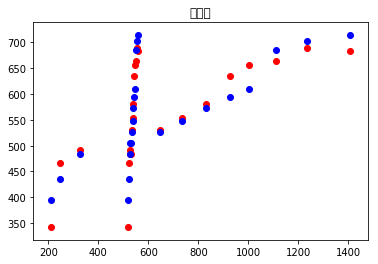

In [30]:
plt.scatter(X1,Y,color='red')
plt.scatter(X2,Y,color='red')
plt.scatter(X1,y_hat,color='blue')
plt.scatter(X2,y_hat,color='blue')
plt.title("对比图") #蓝色为预测值 红色为真实
plt.show()

# 皮尔预测模型 

In [31]:
X1 = np.array([10091,10551,10389,10702,11078,10565,11063,25163,21697,23904,25003.7,29863,32962.2,33704,39984.4,38879.6,35156,38902,41079,43844]).reshape(-1,1)
X2 = np.array([88.4,93.46,94.01,87.67,95.86,99.98,111.9,146.87,137.93,149.94,172.4,189.85,237.99,237.94,304.2,281.6,263.45,317.76,331.6,362.4]).reshape(-1,1)
X3 = np.array([8552,8864,8928,9475,9880,9277,9528,23518,20095,22397.1,23437.9,28048,30796,31586,37909,36726,33039,36505,38509,40861]).reshape(-1,1)
X4 = np.array([59.9,64.81,97.66,65.77,71.83,69.89,73.38,101.77,93.1,102.4,119.5,131.8,164.2,171.2,232.76,210.1,192.87,227.21,233.12,247.71]).reshape(-1,1)
years = np.arange(1987,2007).reshape(-1,1)

In [32]:
data = np.column_stack([years,X1,X2,X3,X4])
df1 = pd.DataFrame(data,columns=['年份','客运量/万人','旅客周转量/亿人千米','公路客运量/万人','公路旅客周转量/亿人千米'])
df1

,年份,客运量/万人,旅客周转量/亿人千米,公路客运量/万人,公路旅客周转量/亿人千米
0,1987.0,10091.0,88.40,8552.0,59.90
1,1988.0,10551.0,93.46,8864.0,64.81
2,1989.0,10389.0,94.01,8928.0,97.66
3,1990.0,10702.0,87.67,9475.0,65.77
4,1991.0,11078.0,95.86,9880.0,71.83
5,1992.0,10565.0,99.98,9277.0,69.89
6,1993.0,11063.0,111.90,9528.0,73.38
7,1994.0,25163.0,146.87,23518.0,101.77
8,1995.0,21697.0,137.93,20095.0,93.10
9,1996.0,23904.0,149.94,22397.1,102.40


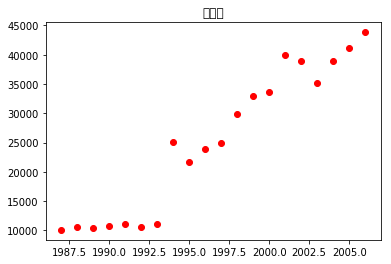

In [33]:
plt.scatter(years,X1,color='red')
plt.title("观测值")
plt.show()

In [34]:
def S_n(n,X):
    r = n//3
    S1 = np.sum(1/X[0:r,0].reshape(-1,1))
    S2 = np.sum(1/X[r:2*r,0].reshape(-1,1))
    S3 = np.sum(1/X[2*r:3*r,0].reshape(-1,1))
    return r,S1,S2,S3

In [35]:
def pearl(S1,S2,S3,r):
    b = (np.log(S1-S2)-np.log(S2-S3))/r
    L = r/(S1-((S1-S2)**2)/((S1-S2)-(S2-S3)))
    a = ((S1-S2)**2*(1-np.exp(-b))*L)/(((S1-S2)-(S2-S3))*np.exp(-b)*(1-np.exp(-r*b)))
    return b,L,a

In [36]:
r,S1,S2,S3 = S_n(X1.shape[0],X1)
b1,L1,a1 = pearl(S1,S2,S3,r)
r,S1,S2,S3 = S_n(X2.shape[0],X2)
b2,L2,a2 = pearl(S1,S2,S3,r)
r,S1,S2,S3 = S_n(X3.shape[0],X3)
b3,L3,a3 = pearl(S1,S2,S3,r)
r,S1,S2,S3 = S_n(X4.shape[0],X4)
b4,L4,a4 = pearl(S1,S2,S3,r)



In [37]:
print(b1,L1,a1)
print(b2,L2,a2)
print(b3,L3,a3)
print(b4,L4,a4)

0.130409093718 103132.211931 13.508047349
0.0412649469769 -136.887134564 -2.84820217454
0.140334515423 91209.0524268 14.2572759046
-0.020914554552 21.4759794263 -0.64358007626
